In [40]:
from platform import python_version
print('Versão Python: {}' .format(python_version()))

Versão Python: 3.12.4


In [41]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns

In [42]:
# Ignorando avisos de warnings
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [43]:
# Carregando os dados
carrega_dados = pd.read_csv('dados/ventas-por-factura.csv')

In [44]:
carrega_dados.head()

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,"-1,45"
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,"39,95"
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,"344,83"


In [7]:
carrega_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25953 entries, 0 to 25952
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   N° de factura     25953 non-null  object 
 1   Fecha de factura  25953 non-null  object 
 2   ID Cliente        22229 non-null  float64
 3   País              25953 non-null  object 
 4   Cantidad          25953 non-null  int64  
 5   Monto             25953 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [8]:
carrega_dados.columns

Index(['N° de factura', 'Fecha de factura', 'ID Cliente', 'País', 'Cantidad',
       'Monto'],
      dtype='object')

In [9]:
df1 = carrega_dados

In [10]:
# Verifica os valores ausentes por coluna
df1.isna().sum()

N° de factura          0
Fecha de factura       0
ID Cliente          3724
País                   0
Cantidad               0
Monto                  0
dtype: int64

In [11]:
# Excluindo valores ausentes
df1 = carrega_dados.dropna()
df1.isna().sum()

N° de factura       0
Fecha de factura    0
ID Cliente          0
País                0
Cantidad            0
Monto               0
dtype: int64

In [12]:
# df1.head()
df1.shape

(22229, 6)

In [13]:
# Limpeza e Pré-processamento dos dados

# Alterando vírgula para ponto, para podermos converter para valor numérico
df1['Monto'] = df1['Monto'].str.replace(',', '.')
    
# Converte coluna
df1['Monto'] = df1['Monto'].astype(float)

/tmp/ipykernel_74338/1191751825.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Monto'] = df1['Monto'].str.replace(',', '.')
/tmp/ipykernel_74338/1191751825.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Monto'] = df1['Monto'].astype(float)


In [14]:
# Excluindo valores negativos
df1 = df1[df1['Cantidad'] >= 0]
df1 = df1[df1['Monto'] >= 0]
df1

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,229.33
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,209.73
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,39.95
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,344.83
5,576630,11/16/2021 8:38:00,13816.0,Germany,91,199.98
...,...,...,...,...,...,...
25945,579252,11/28/2021 16:47:00,17450.0,United Kingdom,432,1034.40
25946,574908,11/7/2021 15:37:00,16009.0,United Kingdom,28,82.76
25949,553060,5/13/2021 10:44:00,15826.0,United Kingdom,488,720.00
25950,577049,11/17/2021 13:58:00,17397.0,United Kingdom,104,298.78


In [15]:
df1.shape

(18570, 6)

In [16]:
# Verificando se há valores menores que zero em 'Cantidad'
#(df1['Cantidad'] < 0).any().sum()
df1[df1['Cantidad'] < 0].any().sum()

0

In [17]:
# Excluindo dados de transações canceladas
# No dicionário do dataset, está especificado que contém informações na coluna 'Nº de Fatura'
# que possuem a letra 'C', dado como cancelamento de compra.
df1[~df1['N° de factura'].str.contains('c', case = False)]

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,229.33
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,209.73
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,39.95
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,344.83
5,576630,11/16/2021 8:38:00,13816.0,Germany,91,199.98
...,...,...,...,...,...,...
25945,579252,11/28/2021 16:47:00,17450.0,United Kingdom,432,1034.40
25946,574908,11/7/2021 15:37:00,16009.0,United Kingdom,28,82.76
25949,553060,5/13/2021 10:44:00,15826.0,United Kingdom,488,720.00
25950,577049,11/17/2021 13:58:00,17397.0,United Kingdom,104,298.78


In [18]:
df1.shape

(18570, 6)

In [19]:
# Verifica se ainda há alguma observação com status cancelado.
df1['N° de factura'].str.contains('c', case = False).sum()

0

In [20]:
# Verifica duplicados
verifica_duplicado = df1['N° de factura'].duplicated().sum()

# Removendo valores duplicados da coluna 'Nº Fatura'
dados = df1.drop_duplicates(subset = ['N° de factura'])

print("O total de duplicados na coluna 'Nº Fatura' era: {}" .format(verifica_duplicado))
print("Após o tratamento, este número foi para: {}" .format(dados['N° de factura'].duplicated().sum()))

O total de duplicados na coluna 'Nº Fatura' era: 34
Após o tratamento, este número foi para: 0


In [21]:
dados.shape

(18536, 6)

In [22]:
dados.head()

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,229.33
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,209.73
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,39.95
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,344.83
5,576630,11/16/2021 8:38:00,13816.0,Germany,91,199.98


In [23]:
dataset = dados

dataset['Monto'].info()

<class 'pandas.core.series.Series'>
Index: 18536 entries, 0 to 25951
Series name: Monto
Non-Null Count  Dtype  
--------------  -----  
18536 non-null  float64
dtypes: float64(1)
memory usage: 289.6 KB


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18536 entries, 0 to 25951
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   N° de factura     18536 non-null  object 
 1   Fecha de factura  18536 non-null  object 
 2   ID Cliente        18536 non-null  float64
 3   País              18536 non-null  object 
 4   Cantidad          18536 non-null  int64  
 5   Monto             18536 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1013.7+ KB


In [25]:
# Criando uma nova coluna 
# O uso do loc foi feito para não gerar warnings, já que não estou realizando operações
# no dataset original e sim em parte dele
dataset.loc[:, 'MontoTotal'] = dataset['Cantidad'] * dataset['Monto']

/tmp/ipykernel_74338/1080108825.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:, 'MontoTotal'] = dataset['Cantidad'] * dataset['Monto']


In [26]:
dataset.head(8)

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto,MontoTotal
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,229.33,28207.59
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,209.73,34185.99
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,39.95,39.95
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,344.83,123104.31
5,576630,11/16/2021 8:38:00,13816.0,Germany,91,199.98,18198.18
6,538125,12/9/2020 15:46:00,18225.0,United Kingdom,16,30.00,480.00
7,544354,2/18/2021 10:42:00,13489.0,United Kingdom,64,77.28,4945.92
8,546369,3/11/2021 11:41:00,15513.0,United Kingdom,10,67.50,675.00


In [27]:
# Respondendo a duas perguntas de negócios.
# Quantos transações foram realizadas?
# Qual o total de clientes?
numero_transacoes = dataset['N° de factura'].count()                  # len(dataset['ID Cliente'])
numero_clientes = len(dataset['ID Cliente'].unique())

print('O total de transações realizadas é: {}' .format(numero_transacoes))
print('Nosso número de clientes é: {}' .format(numero_clientes))

O total de transações realizadas é: 18536
Nosso número de clientes é: 4339


In [28]:
# Qual o total gasto por cliente?
gasto_por_cliente = dataset.groupby('ID Cliente')['MontoTotal'].sum()
total_gasto = pd.DataFrame(gasto_por_cliente)
total_gasto

,MontoTotal
ID Cliente,
12346.0,5.728181e+09
12347.0,1.839237e+06
12348.0,1.422256e+06
12349.0,1.109014e+06
12350.0,6.587680e+04
...,...
18280.0,8.127000e+03
18281.0,4.364280e+03
18282.0,9.695270e+03


In [29]:
dataset2 = dataset

In [30]:
# Renomeando as colunas do dataset
renomeia_col = {
    
          'N° de factura' : 'Numero_fatura',
          'Fecha de factura' : 'Data_transacao',
          'ID Cliente' : 'ID_cliente',
          'Cantidad' : 'Quantidade',
          'Monto' : 'Valor_fatura',
          'MontoTotal' : 'Valor_total_fatura'
}

# Faz as alterações no dataframe
dataset2 = dataset2.rename(columns = renomeia_col)
dataset2

,Numero_fatura,Data_transacao,ID_cliente,País,Quantidade,Valor_fatura,Valor_total_fatura
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,229.33,28207.59
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,209.73,34185.99
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,39.95,39.95
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,344.83,123104.31
5,576630,11/16/2021 8:38:00,13816.0,Germany,91,199.98,18198.18
...,...,...,...,...,...,...,...
25945,579252,11/28/2021 16:47:00,17450.0,United Kingdom,432,1034.40,446860.80
25946,574908,11/7/2021 15:37:00,16009.0,United Kingdom,28,82.76,2317.28
25949,553060,5/13/2021 10:44:00,15826.0,United Kingdom,488,720.00,351360.00
25950,577049,11/17/2021 13:58:00,17397.0,United Kingdom,104,298.78,31073.12


In [31]:
# Convertendo a coluna da data da transação para o tipo date e depois extraindo apenas a data de cada registro
dataset2['Data_transacao'] = pd.to_datetime(dataset2['Data_transacao'], dayfirst = False)
dataset2['Data_transacao'] =  dataset2['Data_transacao'].dt.date
str(dataset2['Data_transacao'])

'0        2021-03-30\n1        2021-11-11\n3        2021-04-06\n4        2021-10-27\n5        2021-11-16\n            ...    \n25945    2021-11-28\n25946    2021-11-07\n25949    2021-05-13\n25950    2021-11-17\n25951    2021-04-14\nName: Data_transacao, Length: 18536, dtype: object'

In [32]:
dataset2.shape

(18536, 7)

In [33]:
# Verificaremos a data da última transação e criaremos uma data referência baseada na última transação
# para em seguida realizar o calculo da frenquência.

# Retorna a última transação
print("Data da última transação: {}" .format(max(dataset2['Data_transacao'])))

# Converter a string para um objeto datetime
date_ref = datetime.strptime("12/31/2021", "%m/%d/%Y").date()
print(f"Data referência: {date_ref}")

Data da última transação: 2021-12-09
Data referência: 2021-12-31


In [34]:
# Agrupar por 'ID_cliente' e calcular as métricas
x = dataset2.groupby('ID_cliente').agg(
        Recencia = ('Data_transacao', lambda x: (date_ref - x.max()).days),
        Frequencia = ('ID_cliente', 'count'),
        Monetario = ('Valor_total_fatura', 'sum'),
        Primeira_Compra = ('Data_transacao', 'min')
).reset_index()

# Mostrar o DataFrame resultante
print(x)



      ID_cliente  Recencia  Frequencia     Monetario Primeira_Compra
0        12346.0       347           1  5.728181e+09      2021-01-18
1        12347.0        24           7  1.839237e+06      2020-12-07
2        12348.0        97           4  1.422256e+06      2020-12-16
3        12349.0        40           1  1.109014e+06      2021-11-21
4        12350.0       332           1  6.587680e+04      2021-02-02
...          ...       ...         ...           ...             ...
4334     18280.0       299           1  8.127000e+03      2021-03-07
4335     18281.0       202           1  4.364280e+03      2021-06-12
4336     18282.0        29           2  9.695270e+03      2021-08-05
4337     18283.0        25          16  2.531530e+05      2021-01-06
4338     18287.0        64           3  1.372397e+06      2021-05-22

[4339 rows x 5 columns]


In [35]:
# Tratando os valores outlies
Q1 = x['Monetario'].quantile(0.25)
Q3 = x['Monetario'].quantile(0.75)
IQR = Q3 - Q1

# Filtrando e removendo os valores outlies
x = x[(x['Monetario'] >= (Q1 - 1.5 * IQR)) & (x['Monetario'] <= (Q3 + 1.5 * IQR))]

In [36]:
# Função para criar elipses em torno dos clusters
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))


In [37]:
np.random.seed(42)

def segmenta_cliente(rfm):
    
    # Cria um dicionário para armazenar os resultados
    resultados = {}
    
    # Obtém os valores RFM
    dados_rfm = rfm[['Recencia', 'Frequencia', 'Monetario']]
    
    # Cria o modelo k-means
    modelo_kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 50, random_state = 42)
    modelo_kmeans.fit(dados_rfm)
    
    # Adiciona os rótulos de cluster aos dados RFM
    dados_rfm['Customer ID'] = rfm['ID_cliente']
    dados_rfm['clusters'] = modelo_kmeans.labels_
    resultados['data'] = dados_rfm
    
    # Plot do modelo
    plt.figure(figsize = (10, 8))
    sns.scatterplot(data = dados_rfm, x = 'Recencia', y = 'Frequencia', hue = 'clusters', palette = 'viridis')
    plt.title('Segmentação de Clientes usando K-means')
    plt.xlabel('Recência')
    plt.ylabel('Frequência')
    plt.legend(title = 'Cluster')
    plt.show()
    
    return resultados



/tmp/ipykernel_74338/3988703955.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_rfm['Customer ID'] = rfm['ID_cliente']


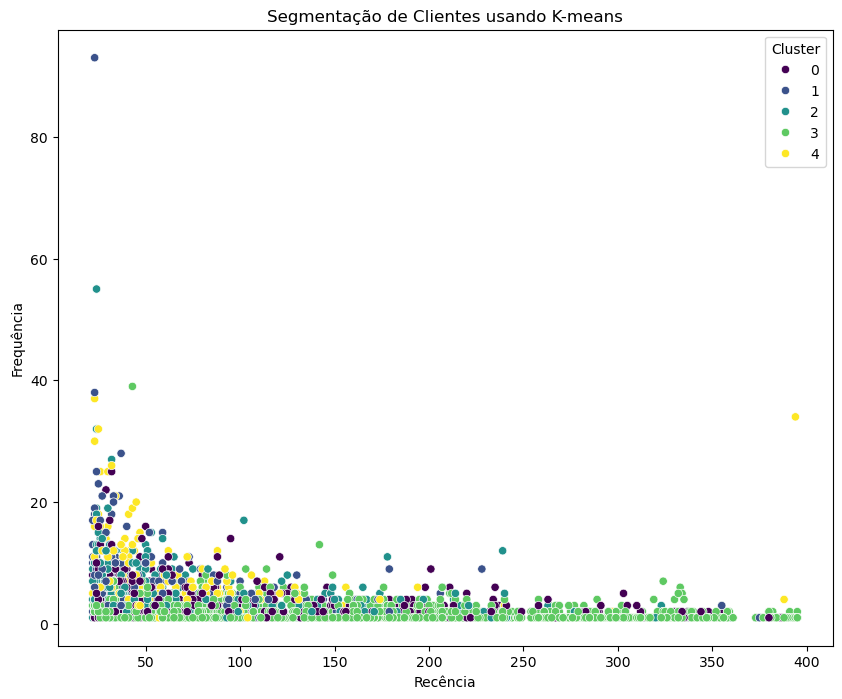

{'data':       Recencia  Frequencia  Monetario  Customer ID  clusters
 4          332           1   65876.80      12350.0         3
 5           58           8  144331.37      12352.0         0
 6          226           1    1780.00      12353.0         3
 7          254           1  572082.00      12354.0         4
 8          236           1  110256.00      12355.0         0
 ...        ...         ...        ...          ...       ...
 4333        95           1   11477.40      18278.0         3
 4334       299           1    8127.00      18280.0         3
 4335       202           1    4364.28      18281.0         3
 4336        29           2    9695.27      18282.0         3
 4337        25          16  253153.00      18283.0         0
 
 [3800 rows x 5 columns]}

In [38]:
# Grafico de segmentação
grafico = segmenta_cliente(x)
grafico

In [39]:
# Tabela
x

,ID_cliente,Recencia,Frequencia,Monetario,Primeira_Compra
4,12350.0,332,1,65876.80,2021-02-02
5,12352.0,58,8,144331.37,2021-02-16
6,12353.0,226,1,1780.00,2021-05-19
7,12354.0,254,1,572082.00,2021-04-21
8,12355.0,236,1,110256.00,2021-05-09
...,...,...,...,...,...
4333,18278.0,95,1,11477.40,2021-09-27
4334,18280.0,299,1,8127.00,2021-03-07
4335,18281.0,202,1,4364.28,2021-06-12
4336,18282.0,29,2,9695.27,2021-08-05
